<a href="https://colab.research.google.com/github/itimes-digital/deep-learning-estudo/blob/main/deep_autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense

In [2]:
(previsores_treinamento, _), (previsores_teste, _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


# Normalização dos dados

In [3]:
previsores_treinamento = previsores_treinamento.astype('float32') / 255
previsores_teste = previsores_teste.astype('float32') / 255

In [5]:
previsores_treinamento = previsores_treinamento.reshape((len(previsores_treinamento), np.prod(previsores_treinamento.shape[1:])))
previsores_teste = previsores_teste.reshape((len(previsores_teste), np.prod(previsores_teste.shape[1:])))

# Criando o modelo

Dimensão do modelo Deep AutoEncoder: 784 -> 128 -> 64 -> 32 -> 64 -> 128 -> 784

In [6]:
model = Sequential()

#Encoder
model.add(Dense(units = 128, activation = 'relu', input_dim = 784))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))

#Decode
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 784, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 784)               101136    
Total params: 222,384
Trainable params: 222,384
Non-trainable params: 0
__________________________________________________

In [7]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
history_ = model.fit(previsores_treinamento, previsores_treinamento,
                     epochs = 100, batch_size = 256,
                     validation_data = (previsores_teste, previsores_teste))

In [18]:
np.mean(history_.history['accuracy'])

0.0153911666944623

In [19]:
dimensao_original = Input(shape = (784,))
camada_encoder0 = model.layers[0]
camada_encoder1 = model.layers[1]
camada_encoder2 = model.layers[2]

In [20]:
encoder = Model(dimensao_original,
                camada_encoder2(camada_encoder1(camada_encoder0(dimensao_original))))

encoder.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


In [21]:
imagens_codificadas = encoder.predict(previsores_teste)
imagens_decodificadas = model.predict(previsores_teste)

In [25]:
numero_imagens = 10
imagens_teste = np.random.randint(previsores_teste.shape[0], size = numero_imagens)

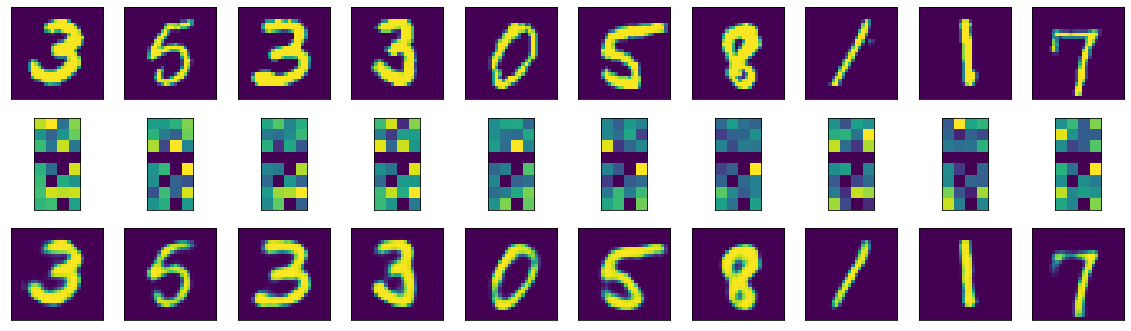

In [26]:
plt.figure(figsize = (20,20))
for i, indice_imagem in enumerate(imagens_teste):
  #Imagem original
  eixo = plt.subplot(10,10, i + 1)
  plt.imshow(previsores_teste[indice_imagem].reshape(28,28))
  plt.xticks(())
  plt.yticks(())

  #Imagem codificada
  eixo = plt.subplot(10,10, i + 1 + numero_imagens)
  plt.imshow(imagens_codificadas[indice_imagem].reshape(8,4))
  plt.xticks(())
  plt.yticks(())

  #Imagem reconstruída
  eixo = plt.subplot(10,10, i + 1 + numero_imagens * 2)
  plt.imshow(imagens_decodificadas[indice_imagem].reshape(28,28))
  plt.xticks(())
  plt.yticks(())